In [1]:
import xgboost as xgb
import numpy as np
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
import time

In [2]:
%%time
# Fetch dataset using sklearn
cov = fetch_covtype()
X = cov.data
y = cov.target

CPU times: user 504 ms, sys: 76 ms, total: 580 ms
Wall time: 578 ms


In [3]:
%%time
# Create 0.75/0.25 train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, train_size=0.75,
                                                    random_state=42)

CPU times: user 92 ms, sys: 60 ms, total: 152 ms
Wall time: 151 ms


In [4]:
%%time
# Convert input data from numpy to XGBoost format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

num_round = 10
maxdepth = 6

CPU times: user 108 ms, sys: 80 ms, total: 188 ms
Wall time: 183 ms


In [5]:
%%time
# GPU HIST DEPTHWISE
param = {'num_class': 1,
         'tree_method': 'gpu_hist',
         'grow_policy': 'depthwise',
         'max_depth': maxdepth,
         'random_state': 1234,
         'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'min_child_weight': 1, 'missing': None, 'n_estimators': 3, 'n_jobs': 1, 'objective': 'reg:linear', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'silent': True, 'subsample': 1, 'verbose': True
         }
gpu_res = {} # Store accuracy result
tmp = time.time()
# Train model
xgb.train(param, dtrain, num_round, evals=[(dtest, 'test')], evals_result=gpu_res)
print("GPU Training Time: %s seconds" % (str(time.time() - tmp)))

[0]	test-rmse:1.93335
[1]	test-rmse:1.7993
[2]	test-rmse:1.68219
[3]	test-rmse:1.57949
[4]	test-rmse:1.4887
[5]	test-rmse:1.40965
[6]	test-rmse:1.34351
[7]	test-rmse:1.28664
[8]	test-rmse:1.23686
[9]	test-rmse:1.19519
GPU Training Time: 1.6539487838745117 seconds
CPU times: user 9.38 s, sys: 708 ms, total: 10.1 s
Wall time: 1.65 s


In [6]:
%%time
# GPU HIST LOSSGUIDE
param = {'num_class': 1,
         'tree_method': 'gpu_hist',
         'grow_policy': 'lossguide',
         'max_depth': 0,
         'max_leaves': np.power(2,maxdepth),
         'random_state': 1234,
         'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'min_child_weight': 1, 'missing': None, 'n_estimators': 3, 'n_jobs': 1, 'objective': 'reg:linear', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'silent': True, 'subsample': 1, 'verbose': True
         }
gpu_res = {} # Store accuracy result
tmp = time.time()
# Train model
xgb.train(param, dtrain, num_round, evals=[(dtest, 'test')], evals_result=gpu_res)
print("GPU Training Time: %s seconds" % (str(time.time() - tmp)))

[0]	test-rmse:1.92719
[1]	test-rmse:1.7862
[2]	test-rmse:1.6628
[3]	test-rmse:1.55483
[4]	test-rmse:1.45983
[5]	test-rmse:1.37748
[6]	test-rmse:1.30655
[7]	test-rmse:1.24515
[8]	test-rmse:1.1919
[9]	test-rmse:1.147
GPU Training Time: 1.1826233863830566 seconds
CPU times: user 9.54 s, sys: 300 ms, total: 9.84 s
Wall time: 1.18 s


In [7]:
%%time
# CPU HIST DEPTHWISE
param = {'tree_method': 'hist',
         'grow_policy': 'depthwise',
         'max_depth': maxdepth,
         'random_state': 1234,
         'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'min_child_weight': 1, 'missing': None, 'n_estimators': 3, 'n_jobs': 1, 'objective': 'reg:linear', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'silent': True, 'subsample': 1, 'verbose': True
         }
cpu_res = {} # Store accuracy result
tmp = time.time()
# Train model
xgb.train(param, dtrain, num_round, evals=[(dtest, 'test')], evals_result=cpu_res)
print("CPU Training Time: %s seconds" % (str(time.time() - tmp)))

[0]	test-rmse:1.93335
[1]	test-rmse:1.7993
[2]	test-rmse:1.68222
[3]	test-rmse:1.57954
[4]	test-rmse:1.48874
[5]	test-rmse:1.40969
[6]	test-rmse:1.34356
[7]	test-rmse:1.28668
[8]	test-rmse:1.2369
[9]	test-rmse:1.19522
CPU Training Time: 1.5683703422546387 seconds
CPU times: user 27.5 s, sys: 116 ms, total: 27.7 s
Wall time: 1.57 s


In [8]:
%%time
# CPU HIST LOSSGUIDE
param = {'tree_method': 'hist',
         'grow_policy': 'lossguide',
         'max_leaves': np.power(2,maxdepth),
         'max_depth': 0,
         'random_state': 1234,
         'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'min_child_weight': 1, 'missing': None, 'n_estimators': 3, 'n_jobs': 1, 'objective': 'reg:linear', 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'silent': True, 'subsample': 1, 'verbose': True
         }
cpu_res = {} # Store accuracy result
tmp = time.time()
# Train model
xgb.train(param, dtrain, num_round, evals=[(dtest, 'test')], evals_result=cpu_res)
print("CPU Training Time: %s seconds" % (str(time.time() - tmp)))

[0]	test-rmse:1.92722
[1]	test-rmse:1.78624
[2]	test-rmse:1.66285
[3]	test-rmse:1.5549
[4]	test-rmse:1.45989
[5]	test-rmse:1.37753
[6]	test-rmse:1.30661
[7]	test-rmse:1.24521
[8]	test-rmse:1.19196
[9]	test-rmse:1.14707
CPU Training Time: 1.4741854667663574 seconds
CPU times: user 28.4 s, sys: 60 ms, total: 28.4 s
Wall time: 1.47 s


In [9]:
%%time
# SKLEARN GPU HIST DEPTHWISE
grow_policy = "depthwise"
eval_metric = "rmse"
model = xgb.XGBRegressor(    n_estimators=num_round,
                             tree_method="gpu_hist",
                             grow_policy=grow_policy,
                             max_depth=maxdepth,
                             n_jobs=1, random_state=1234, verbose=True)
model.fit(X=X_train, y=y_train, verbose=True, eval_set=[(X_test, y_test)], eval_metric=eval_metric)
print(model.get_params())

[0]	validation_0-rmse:1.93335
[1]	validation_0-rmse:1.7993
[2]	validation_0-rmse:1.68219
[3]	validation_0-rmse:1.57949
[4]	validation_0-rmse:1.4887
[5]	validation_0-rmse:1.40965
[6]	validation_0-rmse:1.34351
[7]	validation_0-rmse:1.28664
[8]	validation_0-rmse:1.23686
[9]	validation_0-rmse:1.19519
{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 1, 'missing': None, 'n_estimators': 10, 'n_jobs': 1, 'nthread': None, 'objective': 'reg:linear', 'random_state': 1234, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': True, 'subsample': 1, 'tree_method': 'gpu_hist', 'grow_policy': 'depthwise', 'verbose': True}
CPU times: user 1.36 s, sys: 352 ms, total: 1.72 s
Wall time: 1.72 s


In [10]:
%%time
# SKLEARN GPU HIST LOSSGUIDE
grow_policy = "lossguide"
eval_metric = "rmse"
model = xgb.XGBRegressor(    n_estimators=num_round,
                             tree_method="gpu_hist",
                             grow_policy=grow_policy,
                             max_leaves = np.power(2,maxdepth),
                             max_depth=0,
                             n_jobs=1, random_state=1234, verbose=True)
model.fit(X=X_train, y=y_train, verbose=True, eval_set=[(X_test, y_test)], eval_metric=eval_metric)
print(model.get_params())

[0]	validation_0-rmse:1.92719
[1]	validation_0-rmse:1.7862
[2]	validation_0-rmse:1.6628
[3]	validation_0-rmse:1.55483
[4]	validation_0-rmse:1.45983
[5]	validation_0-rmse:1.37748
[6]	validation_0-rmse:1.30655
[7]	validation_0-rmse:1.24515
[8]	validation_0-rmse:1.1919
[9]	validation_0-rmse:1.147
{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 0, 'min_child_weight': 1, 'missing': None, 'n_estimators': 10, 'n_jobs': 1, 'nthread': None, 'objective': 'reg:linear', 'random_state': 1234, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': True, 'subsample': 1, 'tree_method': 'gpu_hist', 'grow_policy': 'lossguide', 'max_leaves': 64, 'verbose': True}
CPU times: user 1.69 s, sys: 368 ms, total: 2.06 s
Wall time: 2.06 s


In [11]:
%%time
# SKLEARN CPU HIST DEPTHWISE (1 core)
grow_policy = "depthwise"
eval_metric = "rmse"
model = xgb.XGBRegressor(    n_estimators=num_round,
                             tree_method="hist",
                             grow_policy=grow_policy,
                             max_depth=maxdepth,
                             n_jobs=1, random_state=1234, verbose=True)
model.fit(X=X_train, y=y_train, verbose=True, eval_set=[(X_test, y_test)], eval_metric=eval_metric)
print(model.get_params())

[0]	validation_0-rmse:1.93335
[1]	validation_0-rmse:1.7993
[2]	validation_0-rmse:1.68222
[3]	validation_0-rmse:1.57954
[4]	validation_0-rmse:1.48874
[5]	validation_0-rmse:1.40969
[6]	validation_0-rmse:1.34356
[7]	validation_0-rmse:1.28668
[8]	validation_0-rmse:1.2369
[9]	validation_0-rmse:1.19522
{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 6, 'min_child_weight': 1, 'missing': None, 'n_estimators': 10, 'n_jobs': 1, 'nthread': None, 'objective': 'reg:linear', 'random_state': 1234, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': True, 'subsample': 1, 'tree_method': 'hist', 'grow_policy': 'depthwise', 'verbose': True}
CPU times: user 2.77 s, sys: 128 ms, total: 2.9 s
Wall time: 2.88 s


In [12]:
%%time
# SKLEARN CPU HIST LOSSGUIDE (1 core)
grow_policy = "lossguide"
eval_metric = "rmse"
model = xgb.XGBRegressor(    n_estimators=num_round,
                             tree_method="hist",
                             grow_policy=grow_policy,
                             max_leaves = np.power(2,maxdepth),
                             max_depth=0,
                             n_jobs=1, random_state=1234, verbose=True)
model.fit(X=X_train, y=y_train, verbose=True, eval_set=[(X_test, y_test)], eval_metric=eval_metric)
print(model.get_params())

[0]	validation_0-rmse:1.92722
[1]	validation_0-rmse:1.78624
[2]	validation_0-rmse:1.66285
[3]	validation_0-rmse:1.5549
[4]	validation_0-rmse:1.45989
[5]	validation_0-rmse:1.37753
[6]	validation_0-rmse:1.30661
[7]	validation_0-rmse:1.24521
[8]	validation_0-rmse:1.19196
[9]	validation_0-rmse:1.14707
{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bytree': 1, 'gamma': 0, 'learning_rate': 0.1, 'max_delta_step': 0, 'max_depth': 0, 'min_child_weight': 1, 'missing': None, 'n_estimators': 10, 'n_jobs': 1, 'nthread': None, 'objective': 'reg:linear', 'random_state': 1234, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': True, 'subsample': 1, 'tree_method': 'hist', 'grow_policy': 'lossguide', 'max_leaves': 64, 'verbose': True}
CPU times: user 2.87 s, sys: 144 ms, total: 3.01 s
Wall time: 3 s


In [13]:
%%time
###############################################
#
# GPU DEMO of feature importance
#
###############################################
num_round = 200
maxdepth=6
# SKLEARN GPU HIST LOSSGUIDE
grow_policy = "lossguide"
eval_metric = "rmse"
model = xgb.XGBRegressor(    n_estimators=num_round,
                             tree_method="gpu_hist",
                             grow_policy=grow_policy,
                             max_leaves = np.power(2,maxdepth),
                             max_depth=0,
                             n_jobs=1, random_state=1234, verbose=True)
eval_set = [(X_train, y_train),(X_test, y_test)]
model.fit(X=X_train, y=y_train, verbose=True, eval_set=eval_set, eval_metric=eval_metric, early_stopping_rounds=20)
print("Number of trees for best model: %d" % model.best_ntree_limit)
print("Model parameters: %s" % str(model.get_params()))


[0]	validation_0-rmse:1.92746	validation_1-rmse:1.92719
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[1]	validation_0-rmse:1.78572	validation_1-rmse:1.7862
[2]	validation_0-rmse:1.66169	validation_1-rmse:1.6628
[3]	validation_0-rmse:1.55323	validation_1-rmse:1.55483
[4]	validation_0-rmse:1.45744	validation_1-rmse:1.45983
[5]	validation_0-rmse:1.37451	validation_1-rmse:1.37748
[6]	validation_0-rmse:1.30292	validation_1-rmse:1.30655
[7]	validation_0-rmse:1.24094	validation_1-rmse:1.24515
[8]	validation_0-rmse:1.18699	validation_1-rmse:1.1919
[9]	validation_0-rmse:1.14166	validation_1-rmse:1.147
[10]	validation_0-rmse:1.10177	validation_1-rmse:1.10756
[11]	validation_0-rmse:1.06665	validation_1-rmse:1.07299
[12]	validation_0-rmse:1.03709	validation_1-rmse:1.04404
[13]	validation_0-rmse:1.01215	validation_1-rmse:1.01963
[14]	validation_0-rmse:0.98869	validation_1-rmse:0.996532


[137]	validation_0-rmse:0.667407	validation_1-rmse:0.69295
[138]	validation_0-rmse:0.666038	validation_1-rmse:0.691675
[139]	validation_0-rmse:0.665401	validation_1-rmse:0.691172
[140]	validation_0-rmse:0.664792	validation_1-rmse:0.690662
[141]	validation_0-rmse:0.663468	validation_1-rmse:0.689733
[142]	validation_0-rmse:0.663117	validation_1-rmse:0.689447
[143]	validation_0-rmse:0.662185	validation_1-rmse:0.688721
[144]	validation_0-rmse:0.661946	validation_1-rmse:0.688585
[145]	validation_0-rmse:0.660868	validation_1-rmse:0.687502
[146]	validation_0-rmse:0.660473	validation_1-rmse:0.687116
[147]	validation_0-rmse:0.659381	validation_1-rmse:0.686172
[148]	validation_0-rmse:0.658298	validation_1-rmse:0.685166
[149]	validation_0-rmse:0.657114	validation_1-rmse:0.684001
[150]	validation_0-rmse:0.656583	validation_1-rmse:0.683525
[151]	validation_0-rmse:0.65506	validation_1-rmse:0.682093
[152]	validation_0-rmse:0.654309	validation_1-rmse:0.681539
[153]	validation_0-rmse:0.653545	validatio

Test Set Accuracy: 74.37%


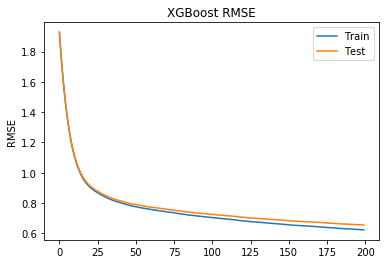

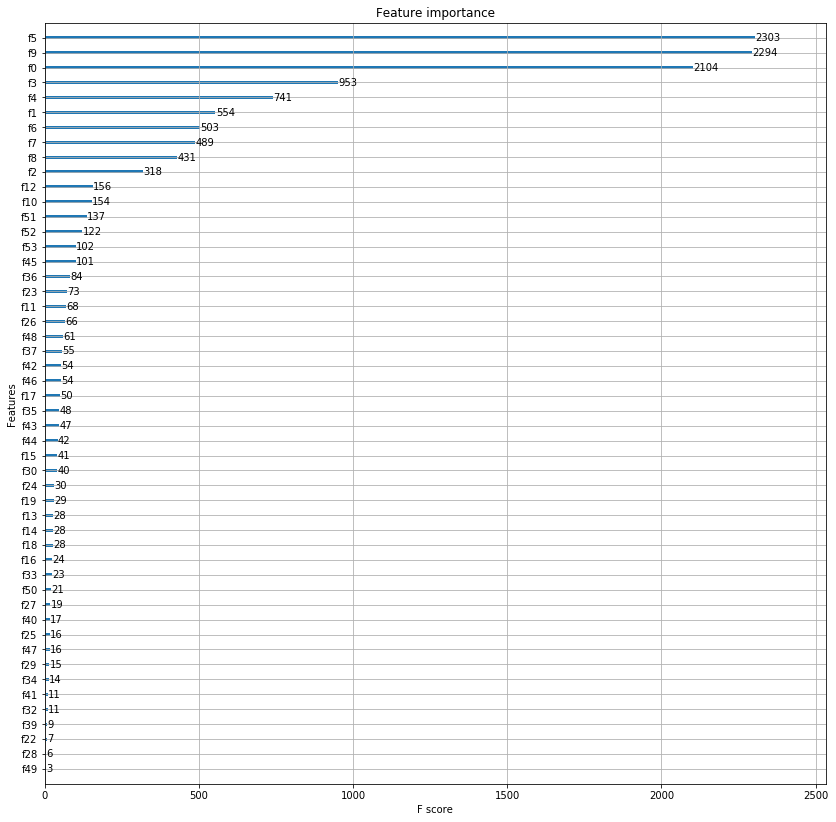

In [14]:
###############################################
#
# GPU DEMO of feature importance
#
###############################################
# Prediction
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print("Test Set Accuracy: %.2f%%" % (accuracy * 100.0))

# Retrieve performance metrics
import matplotlib.pyplot as plt
results = model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['rmse'], label='Train')
ax.plot(x_axis, results['validation_1']['rmse'], label='Test')
ax.legend()
plt.ylabel('RMSE')
plt.title('XGBoost RMSE')
plt.show()

# plot feature importance using built-in function
from xgboost import plot_importance
# plot feature importance
fig, ax = plt.subplots(figsize=(14, 14))
plot_importance(model, ax=ax)
plt.show()

In [15]:
%%time
dofinalcputest=1
if dofinalcputest==1:
    ###############################################
    #
    # CPU Model (compare time to GPU DEMO of feature importance) .  Run on Nvidia GTX 1080ti
    #
    ###############################################
    num_round = 200
    maxdepth=6
    # SKLEARN GPU HIST LOSSGUIDE
    grow_policy = "lossguide"
    eval_metric = "rmse"
    model = xgb.XGBRegressor(    n_estimators=num_round,
                                 tree_method="hist",
                                 grow_policy=grow_policy,
                                 max_leaves = np.power(2,maxdepth),
                                 max_depth=0,
                                 n_jobs=1, random_state=1234, verbose=True)
    eval_set = [(X_train, y_train),(X_test, y_test)]
    model.fit(X=X_train, y=y_train, verbose=True, eval_set=eval_set, eval_metric=eval_metric, early_stopping_rounds=20)
    print("Number of trees for best model: %d" % model.best_ntree_limit)
    print("Model parameters: %s" % str(model.get_params()))

[0]	validation_0-rmse:1.92746	validation_1-rmse:1.92722
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[1]	validation_0-rmse:1.78572	validation_1-rmse:1.78624
[2]	validation_0-rmse:1.66169	validation_1-rmse:1.66285
[3]	validation_0-rmse:1.55323	validation_1-rmse:1.5549
[4]	validation_0-rmse:1.45744	validation_1-rmse:1.45989
[5]	validation_0-rmse:1.37451	validation_1-rmse:1.37753
[6]	validation_0-rmse:1.30292	validation_1-rmse:1.30661
[7]	validation_0-rmse:1.24094	validation_1-rmse:1.24521
[8]	validation_0-rmse:1.187	validation_1-rmse:1.19196
[9]	validation_0-rmse:1.14166	validation_1-rmse:1.14707
[10]	validation_0-rmse:1.10177	validation_1-rmse:1.10766
[11]	validation_0-rmse:1.06665	validation_1-rmse:1.07309
[12]	validation_0-rmse:1.03709	validation_1-rmse:1.04413
[13]	validation_0-rmse:1.01215	validation_1-rmse:1.01973
[14]	validation_0-rmse:0.988691	validation_1-rmse:0.9966

[137]	validation_0-rmse:0.665882	validation_1-rmse:0.691725
[138]	validation_0-rmse:0.665569	validation_1-rmse:0.691475
[139]	validation_0-rmse:0.664804	validation_1-rmse:0.690732
[140]	validation_0-rmse:0.663034	validation_1-rmse:0.689248
[141]	validation_0-rmse:0.661911	validation_1-rmse:0.68824
[142]	validation_0-rmse:0.661177	validation_1-rmse:0.687695
[143]	validation_0-rmse:0.660498	validation_1-rmse:0.687088
[144]	validation_0-rmse:0.659696	validation_1-rmse:0.686451
[145]	validation_0-rmse:0.658335	validation_1-rmse:0.68526
[146]	validation_0-rmse:0.656941	validation_1-rmse:0.683919
[147]	validation_0-rmse:0.655876	validation_1-rmse:0.682826
[148]	validation_0-rmse:0.65555	validation_1-rmse:0.682553
[149]	validation_0-rmse:0.654594	validation_1-rmse:0.681616
[150]	validation_0-rmse:0.653535	validation_1-rmse:0.680531
[151]	validation_0-rmse:0.653005	validation_1-rmse:0.680109
[152]	validation_0-rmse:0.651793	validation_1-rmse:0.679084
[153]	validation_0-rmse:0.650954	validation

In [16]:
# new version using xgbfi-C++
def calc_varimp(context, model, columns, how_many, n_trees, from_depth, to_depth, **kwargs):
    t0 = time.time()
    booster = model._Booster
    booster.feature_names = columns

    max_xgbfi_tree_depth = 7
    max_xgbfi_tree_deepening = -1

    params = model.get_params()
    n_jobs = params['n_jobs']
    df_imp = booster.get_feature_interactions(to_depth,
                                              max_xgbfi_tree_depth,
                                              max_xgbfi_tree_deepening,
                                              n_trees,
                                              nthread=n_jobs)
    if df_imp.shape[0] == 0:
        df_imp = try_calc_varimp_gblinear(booster=booster, columns=columns, **kwargs)

    if df_imp.shape[0] == 0:
        df_imp['fi'] = columns
        df_imp['fi_depth'] = 0
        df_imp['gain'] = 1.0

    depth_from_to = (from_depth <= df_imp.fi_depth) & (df_imp.fi_depth <= to_depth)
    df_imp = df_imp[['fi', 'fi_depth', 'gain']].loc[depth_from_to].reset_index(drop=True)
    df_imp['fi_depth'] = df_imp['fi_depth'].astype(int)

    df_imp_feats = df_imp.loc[df_imp.fi_depth == 0, 'fi'].values
    missing_feats = np.setdiff1d(columns, df_imp_feats)
    if len(missing_feats) > 0 and from_depth == 0:
        df_missing_feats = pd.DataFrame()
        df_missing_feats['fi'] = missing_feats
        df_missing_feats['fi_depth'] = 0
        df_missing_feats['gain'] = 0.0
        df_imp = pd.concat((df_imp, df_missing_feats)) \
            .sort_values(by=['fi_depth', 'gain'], ascending=[True, False]) \
            .reset_index(drop=True)

    df_grp = df_imp.groupby('fi_depth')
    df_imp['gain'] = df_grp['gain'].transform(lambda x: (x / x.max()))
    df_imp = df_grp.head(how_many).reset_index(drop=True)
    df_imp.columns = ['Interaction', 'Depth', 'Gain']

    t1 = time.time()
    return df_imp


def try_calc_varimp_gblinear(booster, columns, **kwargs):
    df_imp = pd.DataFrame()
    dump = booster.get_dump()[0]
    if 'weight:' not in dump:
        return df_imp
    n_models = len(dump.split('\nweight:')[0].split('\n')[1:])
    imp = []
    for w in dump.split('\n')[2 + n_models:-1]:
        imp.append(abs(np.float("{:.6f}".format(float(w)))))
    imp = np.array(imp).reshape((-1, n_models)).mean(axis=1)
    df_imp['fi'] = columns
    df_imp['fi_depth'] = 0
    df_imp['gain'] = imp
    df_imp = df_imp.sort_values(by='gain', ascending=False).reset_index(drop=True)
    return df_imp

In [17]:
context=None
import pandas as pd
pd_X_train = pd.DataFrame(X_train)
booster = model._Booster
#booster.feature_names = [x for x in str(pd_X_train.columns.values)]
booster.feature_names = ["c"+str(x) for x in pd_X_train.columns.values]
kwargs = {}
# params: context, model, columns, N, n_trees, from_depth, to_depth, **kwargs)
Nimportance = 450
Ntrees = model.best_ntree_limit
from_depth = 0
to_depth = maxdepth
imp_features = calc_varimp(context, model, booster.feature_names, Nimportance, Ntrees, from_depth, to_depth, **kwargs)

In [18]:
imp_features[imp_features.Depth==0]

,Interaction,Depth,Gain
0,c0,0,1.000000
1,c9,0,0.172378
2,c5,0,0.159018
3,c12,0,0.116471
4,c45,0,0.108659
5,c10,0,0.052541
6,c3,0,0.045978
7,c52,0,0.045791
8,c8,0,0.037168
9,c4,0,0.029088


In [19]:
imp_features[imp_features.Depth==1]

,Interaction,Depth,Gain
54,c0|c0,1,1.000000
55,c0|c10,1,0.337404
56,c0|c12,1,0.316217
57,c5|c9,1,0.156460
58,c12|c45,1,0.139393
59,c0|c52,1,0.134521
60,c0|c5,1,0.133263
61,c45|c9,1,0.085176
62,c0|c9,1,0.080487
63,c45|c5,1,0.064746
